In [49]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [50]:
dvfs_list = ['1', '0c00', '0d00', '0e00', 
             '0f00', '1000', '1100', '1200', 
             '1300', '1400', '1500', '1600', '1700', '1800', '1900', '1a00']
dvfs_dict = {
    "0x0c00" :  1.2,
    "0x0d00" :  1.3,
    "0x0e00" :  1.4,
    "0x0f00" :  1.5,
    "0x1000" : 1.6,
    "0x1100" : 1.7,
    "0x1200" : 1.8,
    "0x1300" : 1.9,
    "0x1400" : 2.0,
    "0x1500" : 2.1,
    "0x1600" : 2.2,
    "0x1700" : 2.3,
    "0x1800" : 2.4,
    "0x1900" : 2.5,
    "0x1a00" : 2.6,
    "0x1b00" : 2.7,
    "0x1c00" : 2.8,
    "0x1d00" : 2.9,
}

df_dict = {
    'i': [], 'itr': [], 'dvfs': [], 'rate': [], 'policy': [], 'watts_avg': [], 'watts_std': [], 
    
    'pollCnt': [], 'c1Cnt': [], 'c1eCnt': [],'c3Cnt': [], 'c6Cnt': [], 
    'rxPackets': [], 'rxBytes': [], 'txPackets': [], 'txBytes': [],
    'erxPackets': [], 'erxBytes':[], 'etxPackets': [], 'etxBytes':[],
    
    'SinknumRecordsInPerSecond_avg': [], 'SinknumRecordsInPerSecond_std': [], 
    'SinknumRecordsOutPerSecond_avg': [], 'SinknumRecordsOutPerSecond_std': [], 
    'SinkbusyTimeMsPerSecond_avg': [], 'SinkbusyTimeMsPerSecond_std': [], 
    'SinkbackPressuredTimeMsPerSecond_avg': [], 'SinkbackPressuredTimeMsPerSecond_std': [], 
    'SinkbusyTime_%': [], 'SinkbackPressuredTime_%': [], 

    'SourcenumRecordsInPerSecond_avg': [], 'SourcenumRecordsInPerSecond_std': [], 
    'SourcenumRecordsOutPerSecond_avg': [], 'SourcenumRecordsOutPerSecond_std': [], 
    'SourcebusyTimeMsPerSecond_avg': [], 'SourcebusyTimeMsPerSecond_std': [], 
    'SourcebackPressuredTimeMsPerSecond_avg': [], 'SourcebackPressuredTimeMsPerSecond_std': [], 
    'SourcebusyTime_%': [], 'SourcebackPressuredTime_%': [], 

    'MappernumRecordsInPerSecond_avg': [], 
    'MappernumRecordsInPerSecond_std': [], 'MappernumRecordsOutPerSecond_avg': [], 
    'MappernumRecordsOutPerSecond_std': [], 'MapperbusyTimeMsPerSecond_avg': [], 
    'MapperbusyTimeMsPerSecond_std': [], 'MapperbackPressuredTimeMsPerSecond_avg': [], 
    'MapperbackPressuredTimeMsPerSecond_std': [],
    'MapperbusyTime_%': [], 'MapperbackPressuredTime_%': []
}

print(df_dict)
print("*****************************************************************")

{'i': [], 'itr': [], 'dvfs': [], 'rate': [], 'policy': [], 'watts_avg': [], 'watts_std': [], 'pollCnt': [], 'c1Cnt': [], 'c1eCnt': [], 'c3Cnt': [], 'c6Cnt': [], 'rxPackets': [], 'rxBytes': [], 'txPackets': [], 'txBytes': [], 'erxPackets': [], 'erxBytes': [], 'etxPackets': [], 'etxBytes': [], 'SinknumRecordsInPerSecond_avg': [], 'SinknumRecordsInPerSecond_std': [], 'SinknumRecordsOutPerSecond_avg': [], 'SinknumRecordsOutPerSecond_std': [], 'SinkbusyTimeMsPerSecond_avg': [], 'SinkbusyTimeMsPerSecond_std': [], 'SinkbackPressuredTimeMsPerSecond_avg': [], 'SinkbackPressuredTimeMsPerSecond_std': [], 'SinkbusyTime_%': [], 'SinkbackPressuredTime_%': [], 'SourcenumRecordsInPerSecond_avg': [], 'SourcenumRecordsInPerSecond_std': [], 'SourcenumRecordsOutPerSecond_avg': [], 'SourcenumRecordsOutPerSecond_std': [], 'SourcebusyTimeMsPerSecond_avg': [], 'SourcebusyTimeMsPerSecond_std': [], 'SourcebackPressuredTimeMsPerSecond_avg': [], 'SourcebackPressuredTimeMsPerSecond_std': [], 'SourcebusyTime_%': []


300000 0 mean=93.10734109333333 max=95.591949 min=90.814865 std=0.7254677981904818
300000 1 mean=89.87412949 max=102.125656 min=77.909073 std=1.6111459729763253
300000 2 mean=90.43366121333334 max=94.675842 min=86.652084 std=1.219795561122872
300000 3 mean=90.07341330333334 max=93.922226 min=87.103012 std=1.1740506388138308
300000 4 mean=95.03253392333333 max=98.677231 min=91.151825 std=1.1880812708607764
300000 5 mean=87.78055872666667 max=92.857712 min=85.179901 std=1.3254282778197013
300000 6 mean=89.76275594999998 max=96.187393 min=86.298523 std=1.333266680702547
300000 7 mean=91.89978871 max=96.595245 min=88.220657 std=1.2888124300168555
300000 8 mean=89.83485628333334 max=96.429993 min=85.464111 std=1.4152222724374415
300000 9 mean=95.17834464333333 max=100.373627 min=91.695969 std=1.2400324431970011


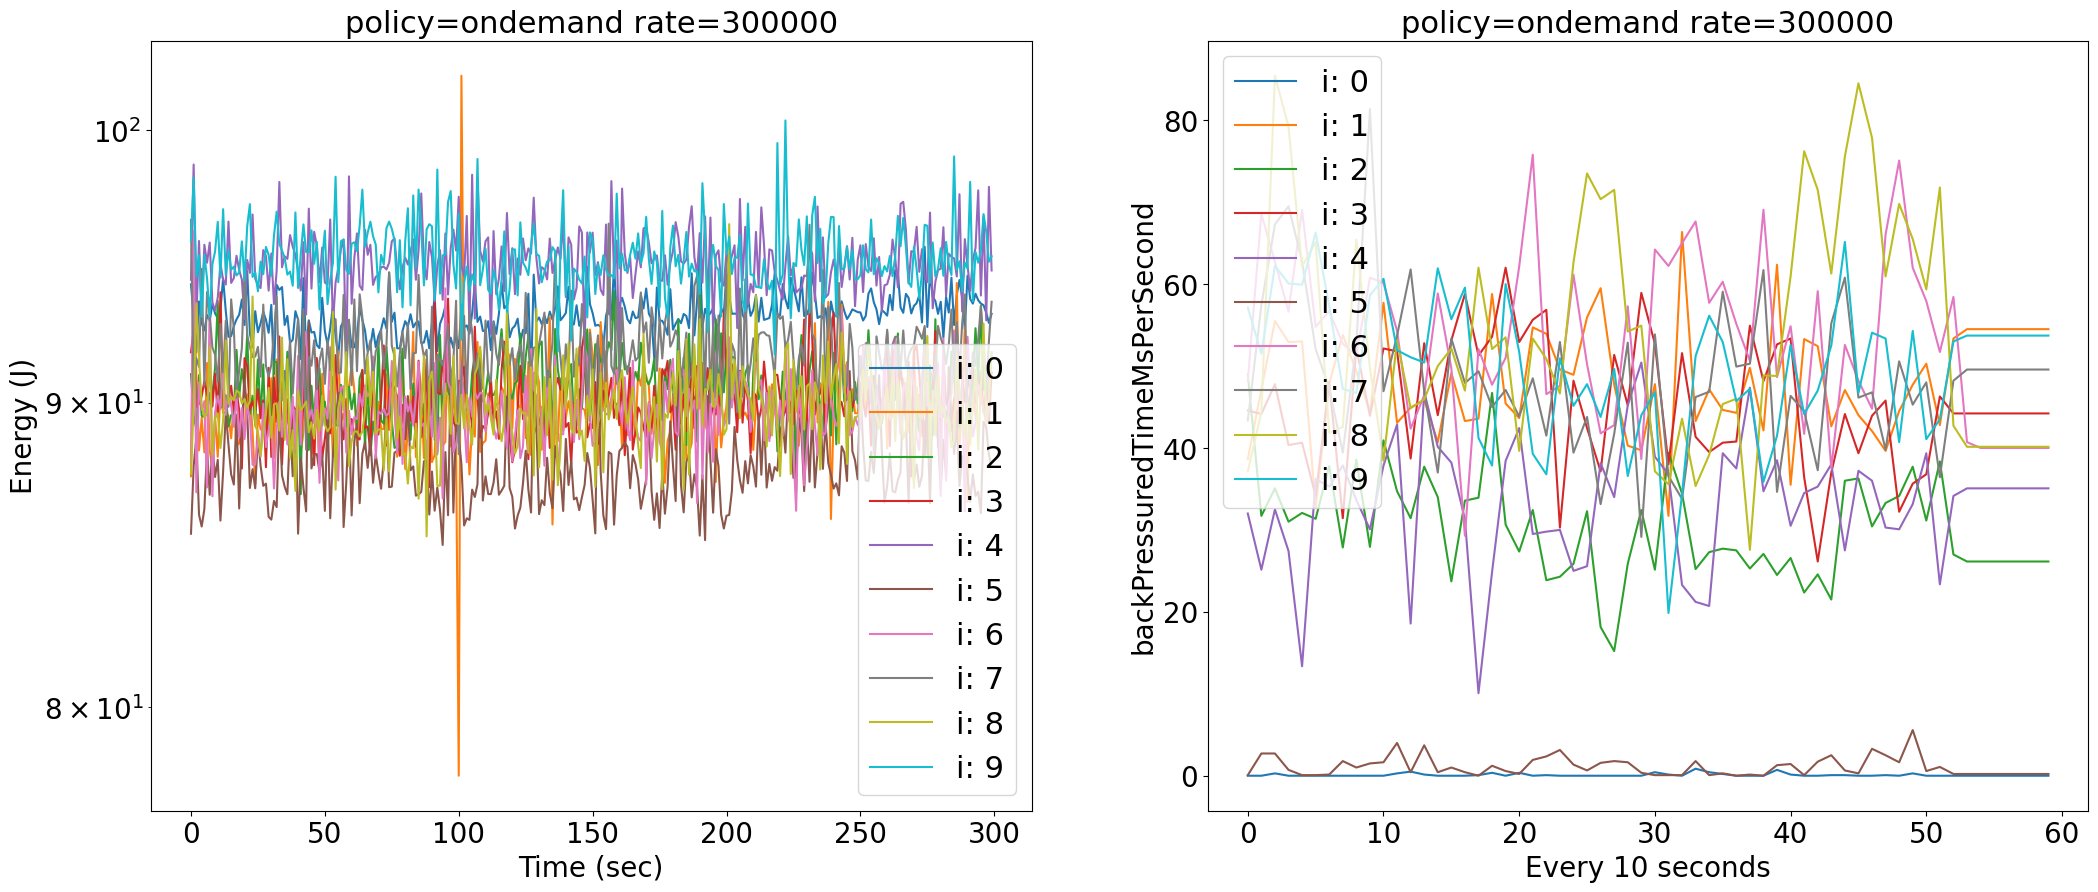

In [63]:
itr=1
dvfs=1
nrepeat = 10
#policies = ["ondemand", "conservative","performance", "schedutil", "dvfspolicy1"]
policies = ["ondemand"]

plt.rcParams['figure.figsize'] = 25, 10
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for rate in [300000]:
#for rate in [200000]:
    print("")
    fig, (ax1, ax2) = plt.subplots(1, 2)
    for i in range(nrepeat):    
        #plt.subplots_adjust(wspace=5, hspace=0)
        for policy in policies:
            if policy == "dvfspolicy1":
                file=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_{policy}_repeat{i}/server2_rapl.log"
            else:
                file=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_itr{itr}_{policy}dvfs{dvfs}_repeat{i}/server2_rapl.log"
            with open(file, "r") as f:
                y = [float(x.strip()) for x in f.readlines()]
            y = y[300:600]
            print(f"{rate} {i} mean={np.mean(y)} max={np.max(y)} min={np.min(y)} std={np.std(y)}")
            ax1.errorbar(range(len(y)), y, label=f"i: {i}")
        #ax1.set_ylim(bottom=50)
        ax1.set_ylabel("Energy (J)")
        ax1.set_xlabel("Time (sec)")
        ax1.set_yscale("log") 
        ax1.legend(fontsize=22)
        ax1.set_title(f"policy={policy} rate={rate}", fontsize=22)
        
        #print(df)
        #for policy in ["ondemand"]:
        for policy in policies:
            colnames = []
            for cnt in range(0, 60):
                colnames.append(f"col{cnt}")
            df = pd.DataFrame(columns=colnames)
            if policy == "dvfspolicy1":
                ddir=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_{policy}_repeat{i}/Flinklogs/"
            else:
                ddir=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_itr{itr}_{policy}dvfs{dvfs}_repeat{i}/Flinklogs/"
            for sr in range(0,14):
                #print(sr)
                ff=open(ddir+"Operator_Source: Bids Source_"+str(sr), 'r').readlines()
                srcs = []
                for _ll, _lc in enumerate(ff):
                    for lc in _lc.split('; '):
                        if "backPressuredTimeMsPerSecond" in lc:
                            ldict=eval(lc.replace('[','').replace(']',''))
                            srcs.append(float(ldict['value']))
                df.loc[-1] = srcs
                df.index = df.index + 1  # shifting index
        #print(df)
            df2 = df.mean(axis=0)
            y = df2.tolist()
            ax2.errorbar(range(len(y)), y, label=f"i: {i}")
            
        
        #ax2.set_ylabel("SourceNumRecordsOut/Second")
        ax2.set_ylabel("backPressuredTimeMsPerSecond")
        ax2.set_xlabel("Every 10 seconds")
        ax2.legend(fontsize=22)
        ax2.set_title(f"policy={policy} rate={rate}", fontsize=22)
        #df2.plot()
        
#300000 0 mean=96.41935393666667 max=99.609772 min=92.902618 std=1.1247896345050448
#300000 1 mean=91.28728946666666 max=103.793915 min=76.622223 std=1.7120520983173737
#300000 2 mean=102.88998121666667 max=107.462189 min=98.031693 std=1.2708486772790886

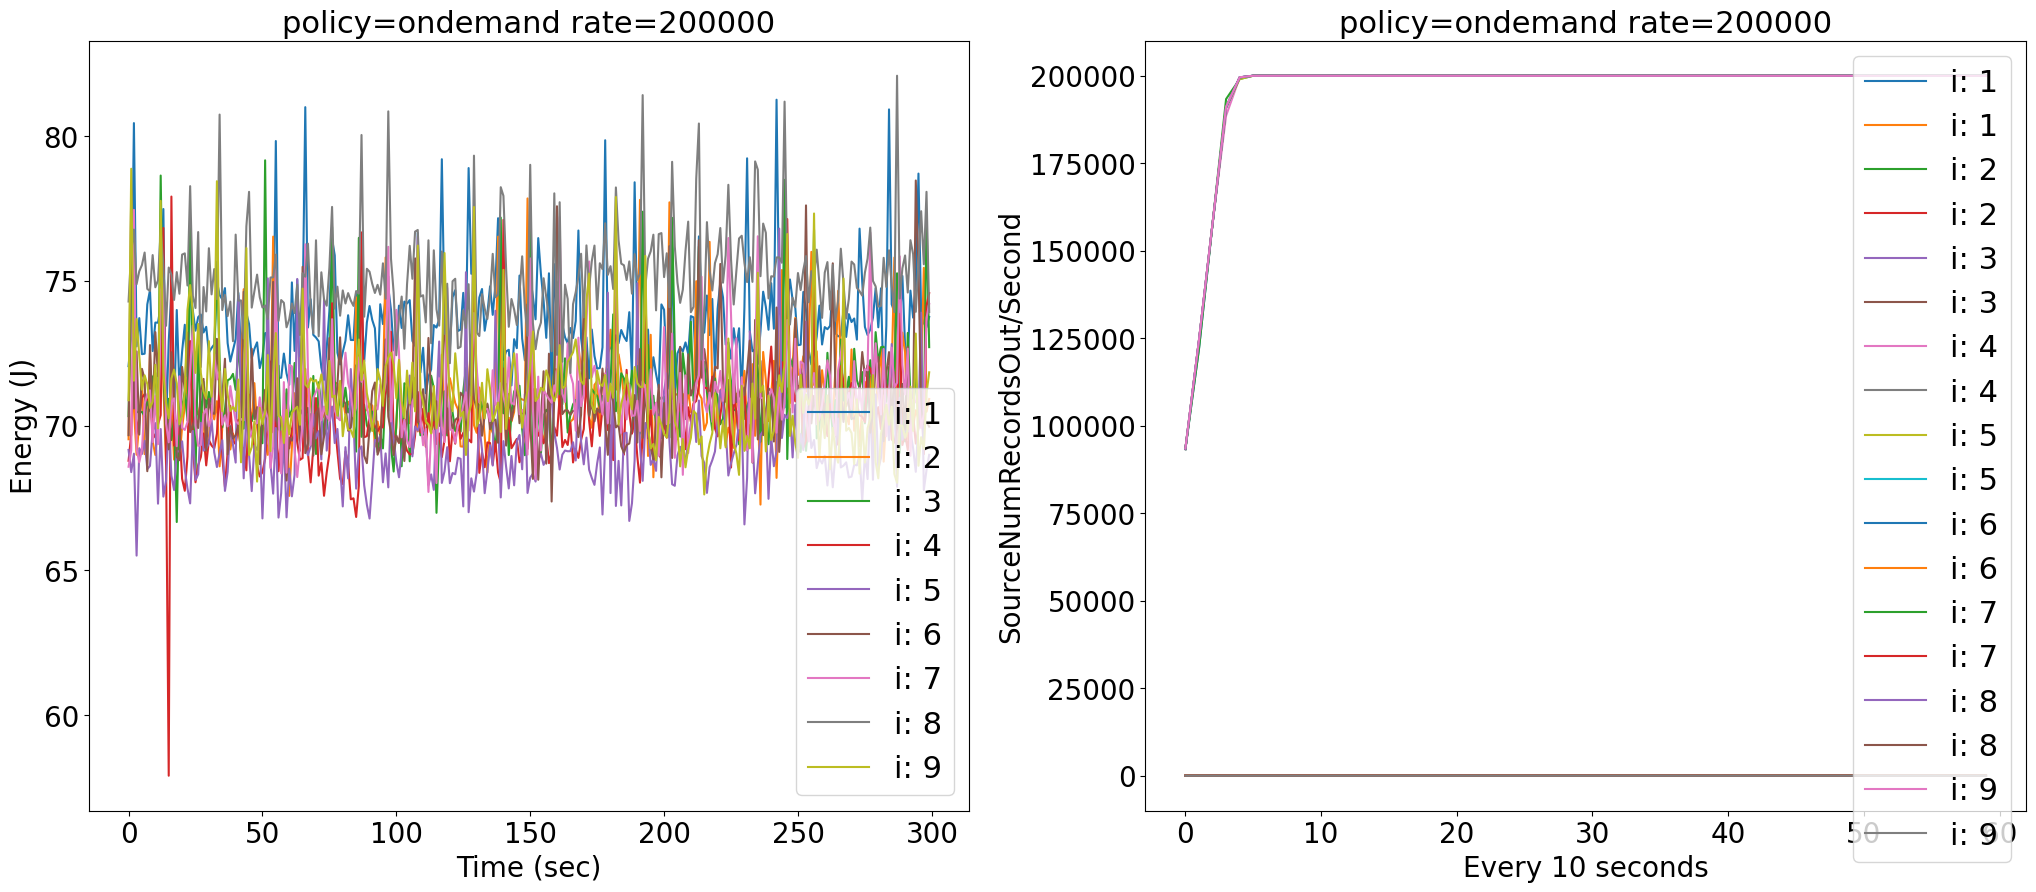

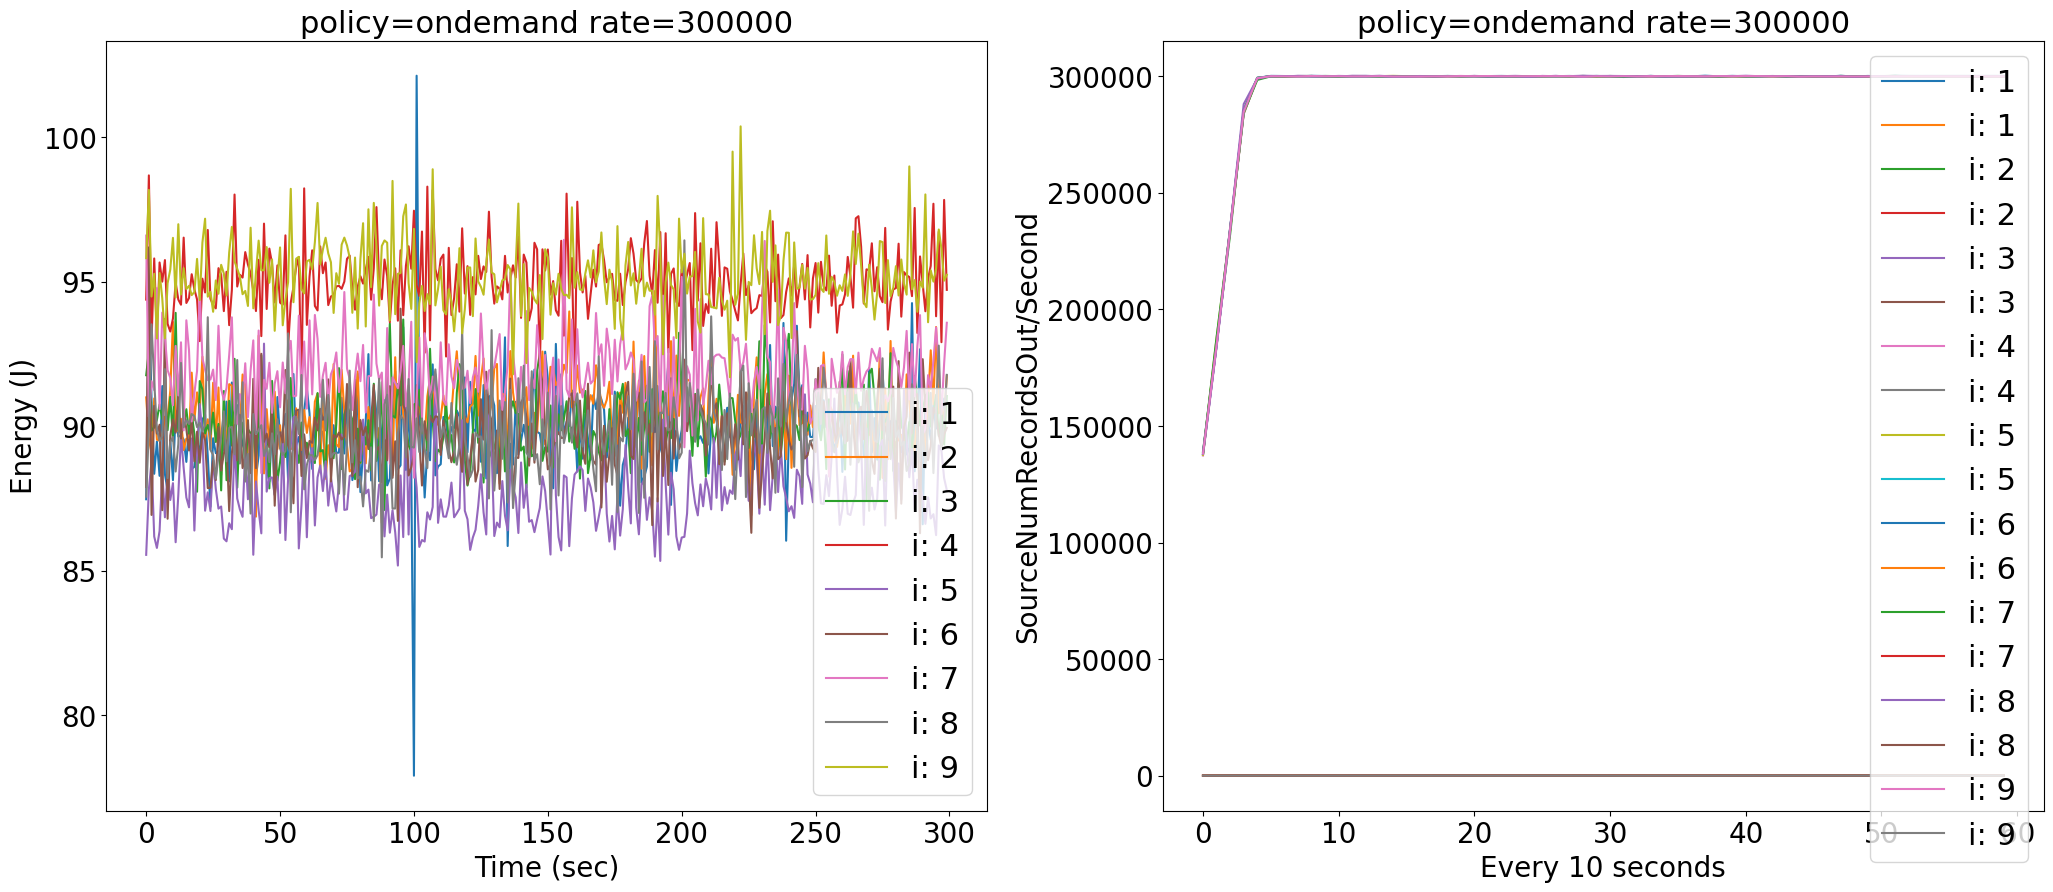

In [48]:
itr=1
dvfs=1
nrepeat = 10
#policies = ["ondemand", "conservative","performance", "schedutil", "dvfspolicy1"]
policies = ["ondemand"]

plt.rcParams['figure.figsize'] = 25, 10
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for rate in [300000]:
#for rate in [200000]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    for i in range(0, nrepeat):    
        #plt.subplots_adjust(wspace=5, hspace=0)
        for policy in policies:
            if policy == "dvfspolicy1":
                file=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_{policy}_repeat{i}/server2_rapl.log"
            else:
                file=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_itr{itr}_{policy}dvfs{dvfs}_repeat{i}/server2_rapl.log"
            with open(file, "r") as f:
                y = [float(x.strip()) for x in f.readlines()]
            y = y[300:600]
            print(f"{rate} {i} mean={np.mean(y)} max={np.max(y)} min={np.min(y)} std={np.std(y)}")
            ax1.errorbar(range(len(y)), y, label=f"i: {i}")
        #ax1.set_ylim(bottom=0)
        ax1.set_ylabel("Energy (J)")
        ax1.set_xlabel("Time (sec)")
        ax1.legend(fontsize=22)
        ax1.set_title(f"policy={policy} rate={rate}", fontsize=22)
        
        #print(df)
        #for policy in ["ondemand"]:
        for policy in policies:
            colnames = []
            for cnt in range(0, 60):
                colnames.append(f"col{cnt}")
            df = pd.DataFrame(columns=colnames)
            if policy == "dvfspolicy1":
                ddir=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_{policy}_repeat{i}/Flinklogs/"
            else:
                ddir=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_itr{itr}_{policy}dvfs{dvfs}_repeat{i}/Flinklogs/"
            for sr in range(0,14):
                #print(sr)
                ff=open(ddir+"Operator_Source: Bids Source_"+str(sr), 'r').readlines()
                srcs = []
                for _ll, _lc in enumerate(ff):
                    for lc in _lc.split('; '):
                        if "numRecordsOutPerSecond" in lc:
                            ldict=eval(lc.replace('[','').replace(']',''))
                            srcs.append(float(ldict['value']))
                df.loc[-1] = srcs
                df.index = df.index + 1  # shifting index
        #print(df)
            df2 = df.mean(axis=0)
            y = df2.tolist()
            ax2.errorbar(range(len(y)), y, label=f"i: {i}")
            
        
        for policy in policies:
            colnames = []
            for cnt in range(0, 60):
                colnames.append(f"col{cnt}")
            df = pd.DataFrame(columns=colnames)
            if policy == "dvfspolicy1":
                ddir=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_{policy}_repeat{i}/Flinklogs/"
            else:
                ddir=f"/home/han/tmp/cl/experiment-scripts/logs/query1_cores16_frate{rate}_600000_fbuff-1_itr{itr}_{policy}dvfs{dvfs}_repeat{i}/Flinklogs/"
            for sr in range(0,14):
                #print(sr)
                ff=open(ddir+"Operator_Source: Bids Source_"+str(sr), 'r').readlines()
                srcs = []
                for _ll, _lc in enumerate(ff):
                    for lc in _lc.split('; '):
                        if "backPressuredTimeMsPerSecond" in lc:
                            ldict=eval(lc.replace('[','').replace(']',''))
                            srcs.append(float(ldict['value']))
                df.loc[-1] = srcs
                df.index = df.index + 1  # shifting index
        #print(df)
            df2 = df.mean(axis=0)
            y = df2.tolist()
            ax2.errorbar(range(len(y)), y, label=f"i: {i}")
            
        ax2.set_ylabel("SourceNumRecordsOut/Second")
        ax2.set_xlabel("Every 10 seconds")
        ax2.legend(fontsize=22)
        ax2.set_title(f"policy={policy} rate={rate}", fontsize=22)
        #df2.plot()

300000 0 mean=112.24763702666665 max=114.379837 min=110.266159 std=0.6582176686939103
300000 1 mean=91.26749343 max=97.538757 min=87.896225 std=1.5135798906447848
300000 2 mean=85.83843396666666 max=105.155197 min=68.742889 std=1.9913720502123315
300000 3 mean=85.81742414333334 max=91.462845 min=82.833405 std=1.2715499333071103
300000 4 mean=88.42173953 max=94.06041 min=84.494583 std=1.777284868893707
300000 5 mean=88.11968048666667 max=92.750702 min=84.830902 std=1.2283621670751599
300000 6 mean=88.39215924000001 max=105.341843 min=72.828262 std=1.797756431476475
300000 7 mean=86.01167647666666 max=92.163651 min=82.965179 std=1.301220920391915
300000 8 mean=86.36308347333333 max=94.426926 min=82.165115 std=1.390916278210277
300000 9 mean=85.86418201 max=91.329712 min=81.76712 std=1.3142042527639368


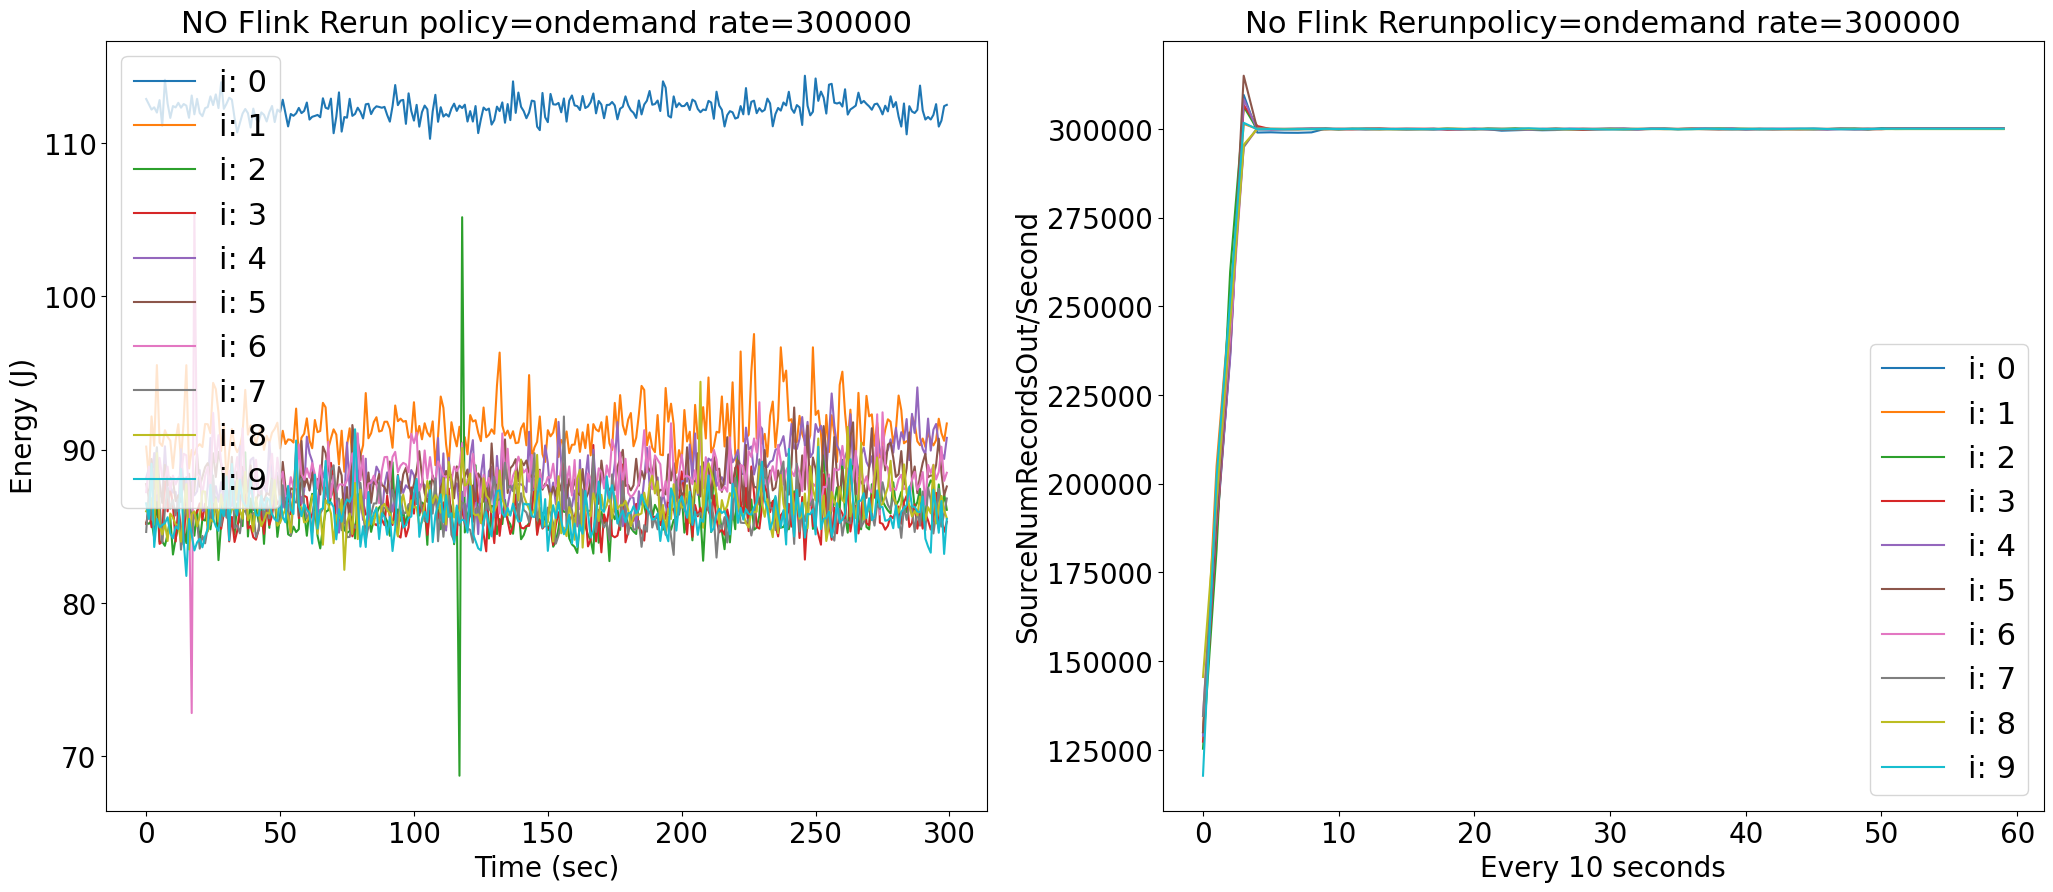

In [62]:
itr=1
dvfs=1
nrepeat = 10
policies = ["ondemand"]

plt.rcParams['figure.figsize'] = 25, 10
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for rate in [300000]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    for i in range(0, nrepeat):    
        for policy in policies:
            if policy == "dvfspolicy1":
                file=f"/home/han/github/logs/dynamic_10_5_2023/query1_cores16_frate{rate}_600000_fbuff-1_{policy}_repeat{i}/server2_rapl.log"
            else:
                file=f"/home/han/github/logs/dynamic_FLINKNORERUN_10_5_2023/query1_cores16_frate{rate}_600000_fbuff-1_itr{itr}_{policy}dvfs{dvfs}_repeat{i}/server2_rapl.log"
            with open(file, "r") as f:
                y = [float(x.strip()) for x in f.readlines()]
            y = y[300:600]
            print(f"{rate} {i} mean={np.mean(y)} max={np.max(y)} min={np.min(y)} std={np.std(y)}")
            ax1.errorbar(range(len(y)), y, label=f"i: {i}")
        #ax1.set_ylim(bottom=0)
        ax1.set_ylabel("Energy (J)")
        ax1.set_xlabel("Time (sec)")
        ax1.legend(fontsize=22)
        ax1.set_title(f"NO Flink Rerun policy={policy} rate={rate}", fontsize=22)
        
        #print(df)
        #for policy in ["ondemand"]:
        for policy in policies:
            colnames = []
            for cnt in range(0, 60):
                colnames.append(f"col{cnt}")
            df = pd.DataFrame(columns=colnames)
            if policy == "dvfspolicy1":
                ddir=f"/home/han/github/logs/dynamic_10_5_2023/query1_cores16_frate{rate}_600000_fbuff-1_{policy}_repeat{i}/Flinklogs/"
            else:
                ddir=f"/home/han/github/logs/dynamic_FLINKNORERUN_10_5_2023/query1_cores16_frate{rate}_600000_fbuff-1_itr{itr}_{policy}dvfs{dvfs}_repeat{i}/Flinklogs/"
            for sr in range(0,14):
                #print(sr)
                ff=open(ddir+"Operator_Source: Bids Source_"+str(sr), 'r').readlines()
                srcs = []
                for _ll, _lc in enumerate(ff):
                    for lc in _lc.split('; '):
                        if "numRecordsOutPerSecond" in lc:
                            ldict=eval(lc.replace('[','').replace(']',''))
                            srcs.append(float(ldict['value']))
                if len(srcs) < 60:
                    srcs.insert(0, 0)
                #print(srcs, len(srcs))
                #print(df)
                df.loc[-1] = srcs
                df.index = df.index + 1  # shifting index
        #print(df)
            df2 = df.mean(axis=0)
            y = df2.tolist()
            ax2.errorbar(range(len(y)), y, label=f"i: {i}")
            
        #ax2.set_ylabel("backPressuredTimeMsPerSecond")
        ax2.set_ylabel("SourceNumRecordsOut/Second")
        ax2.set_xlabel("Every 10 seconds")
        ax2.legend(fontsize=22)
        ax2.set_title(f"No Flink Rerunpolicy={policy} rate={rate}", fontsize=22)
        #df2.plot()
        
#300000 0 mean=96.41935393666667 max=99.609772 min=92.902618 std=1.1247896345050448
#300000 1 mean=91.28728946666666 max=103.793915 min=76.622223 std=1.7120520983173737
#300000 2 mean=102.88998121666667 max=107.462189 min=98.031693 std=1.2708486772790886

#300000 0 mean=93.10734109333333 max=95.591949 min=90.814865 std=0.7254677981904818
#300000 1 mean=89.87412949 max=102.125656 min=77.909073 std=1.6111459729763253
#300000 2 mean=90.43366121333334 max=94.675842 min=86.652084 std=1.219795561122872
#300000 3 mean=90.07341330333334 max=93.922226 min=87.103012 std=1.1740506388138308
#300000 4 mean=95.03253392333333 max=98.677231 min=91.151825 std=1.1880812708607764
#300000 5 mean=87.78055872666667 max=92.857712 min=85.179901 std=1.3254282778197013
#300000 6 mean=89.76275594999998 max=96.187393 min=86.298523 std=1.333266680702547
#300000 7 mean=91.89978871 max=96.595245 min=88.220657 std=1.2888124300168555
#300000 8 mean=89.83485628333334 max=96.429993 min=85.464111 std=1.4152222724374415
#300000 9 mean=95.17834464333333 max=100.373627 min=91.695969 std=1.2400324431970011
